Top 10 nodes by PageRank centrality:
50: 0.2761262000381216
30: 0.11422733995267054
40: 0.08220419402725754
23: 0.03811332402611523
22: 0.03434430458122068
17: 0.030262395744604282
10: 0.02208716456213683
16: 0.021140829436860922
12: 0.019849362960600005
19: 0.01964087676804218


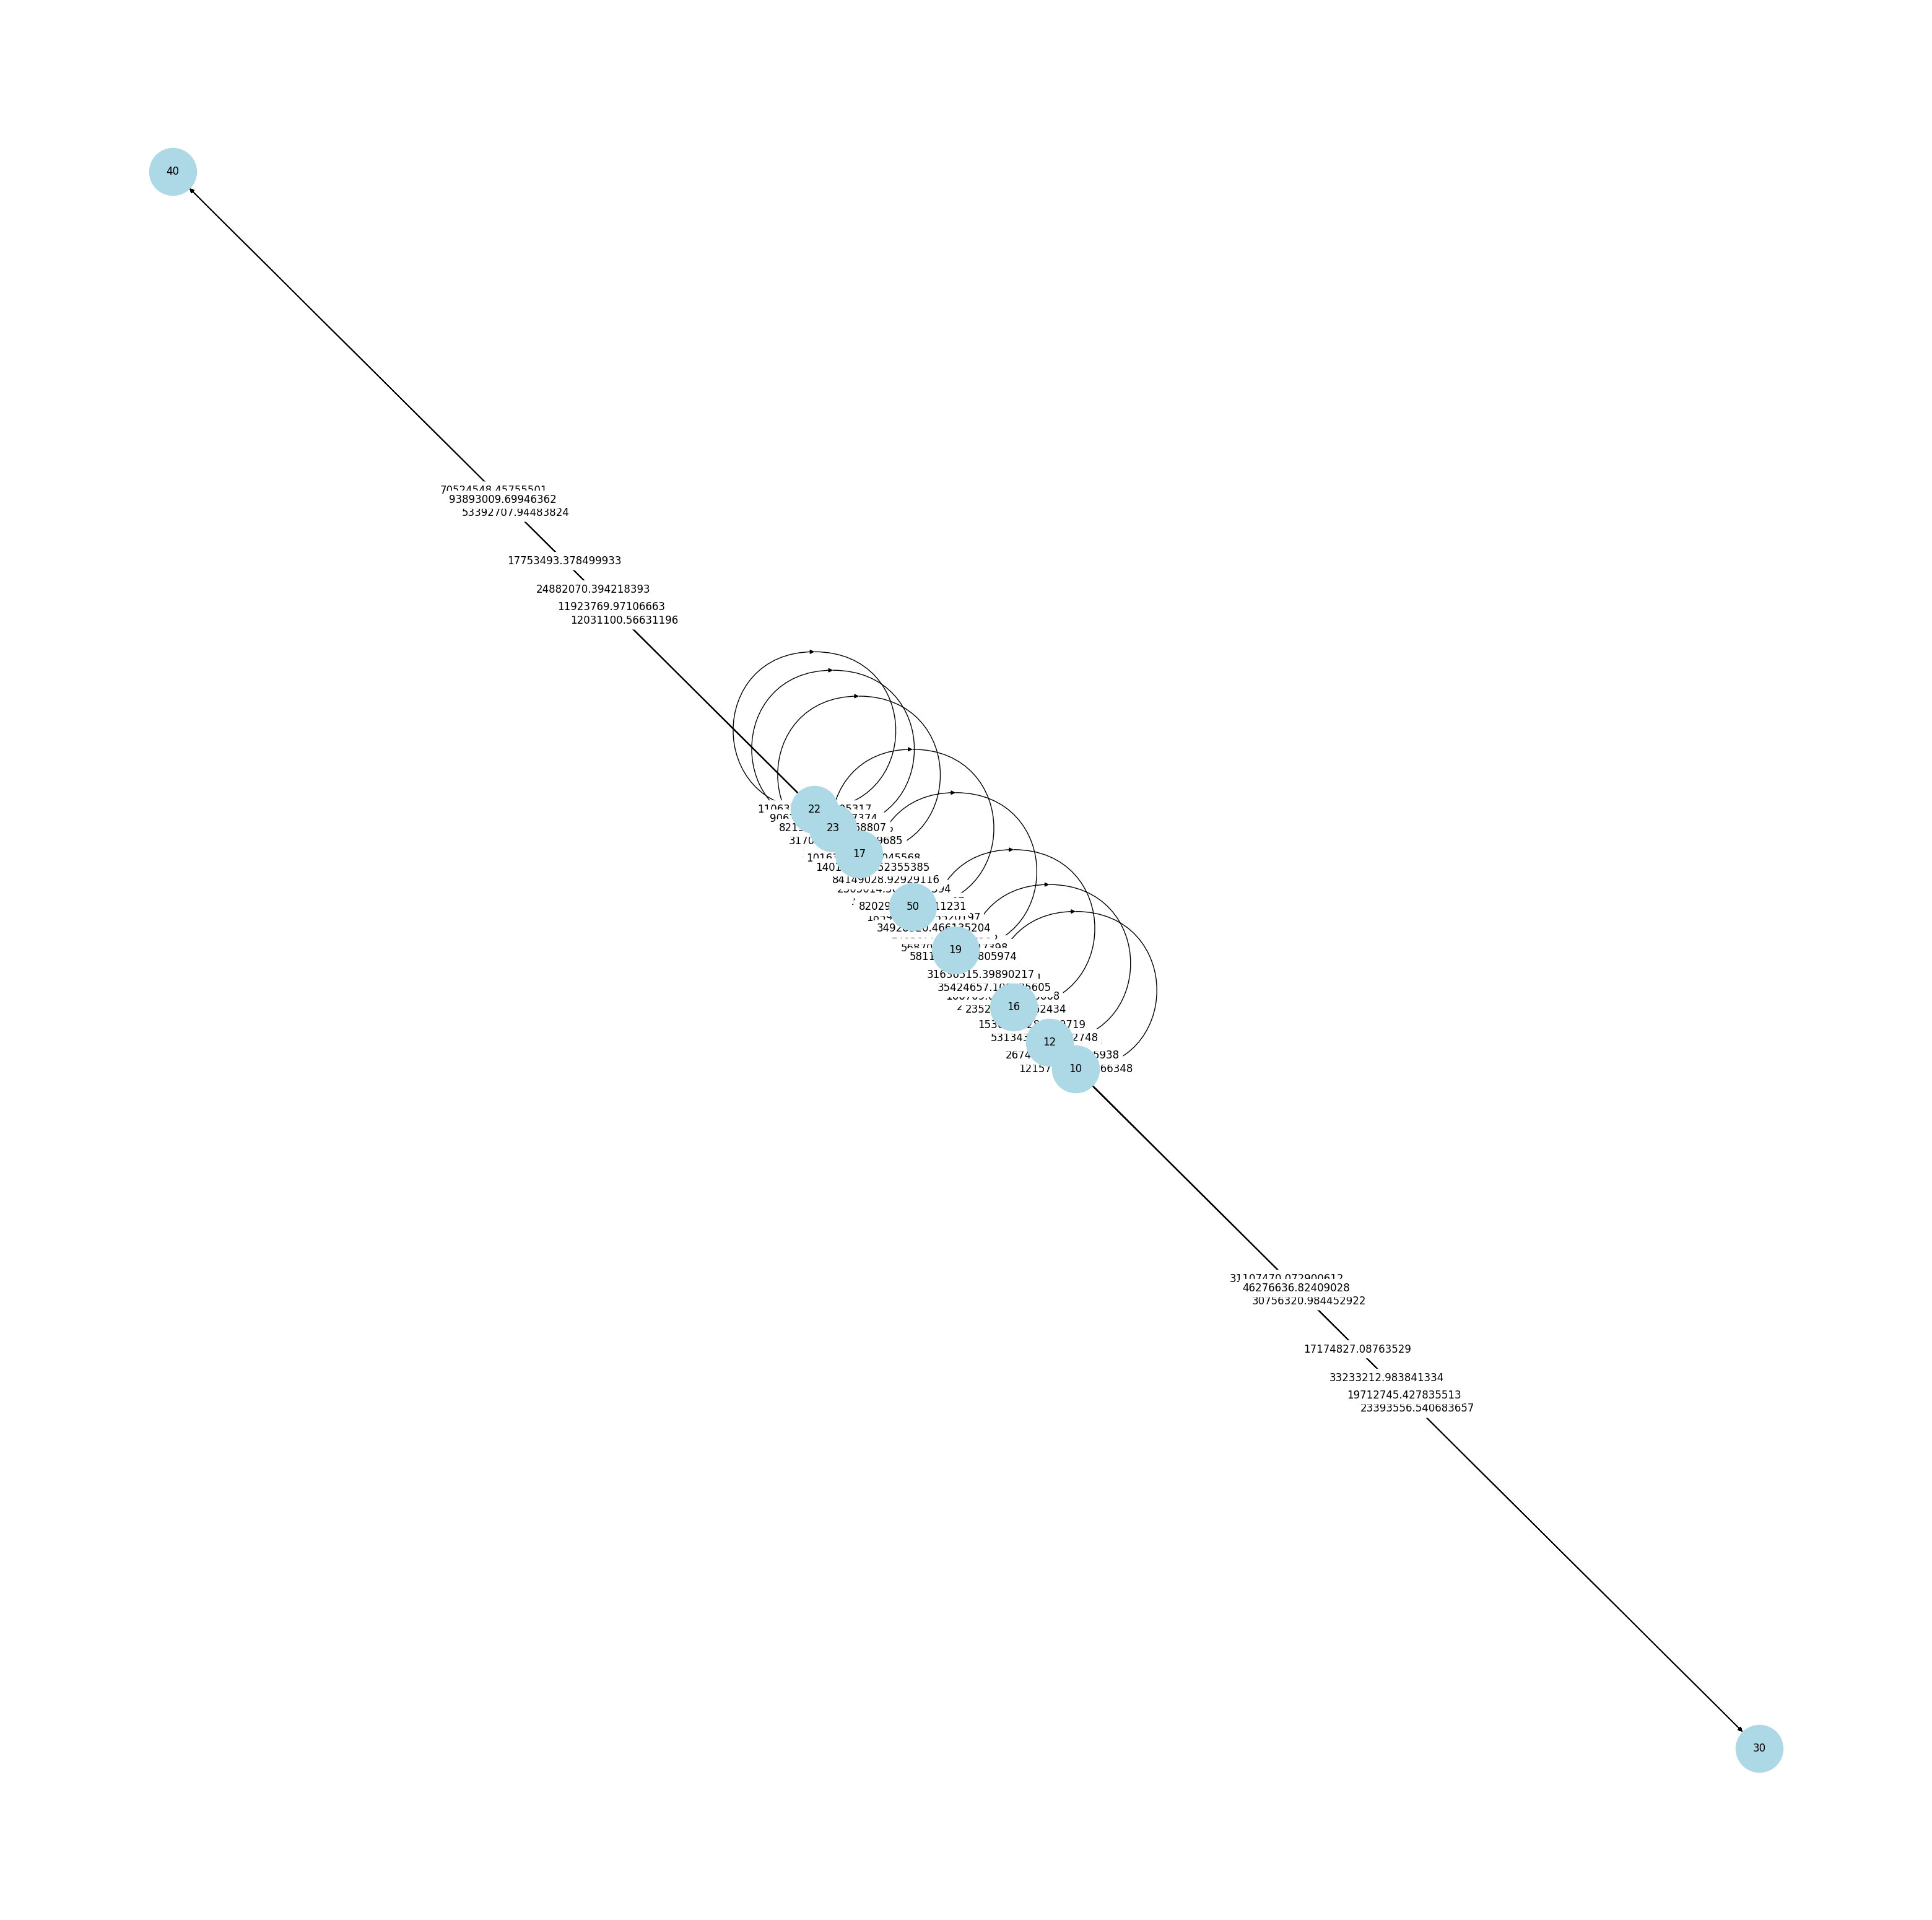

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the WIOD dataset
df = pd.read_csv("WIOD.csv")

# Create a directed graph
G = nx.DiGraph()

# Add nodes for countries and sectors
G.add_nodes_from(df["row_id"].unique().tolist() + df["col_id"].unique().tolist())

# Add edges for trade flows with weights
for index, row in df.iterrows():
    # Get the source and target nodes for the edge
    source = row["col_id"]
    target = row["row_id"]
    # Check if the edge already exists in the graph
    if G.has_edge(source, target):
        # If it does, add the weight of the new edge to the existing edge
        G[source][target]["weight"] += row["value"]
    else:
        # If it doesn't, create a new edge with the weight of the new edge
        G.add_edge(source, target, weight=row["value"])

# Calculate PageRank centrality
pr = nx.pagerank(G, weight="weight")

# Print the top 10 nodes by PageRank centrality
top_nodes = sorted(pr, key=pr.get, reverse=True)[:10]
print("Top 10 nodes by PageRank centrality:")
for node in top_nodes:
    print(f"{node}: {pr[node]}")

# Create a subgraph with only the top ranked nodes and their edges
H = nx.DiGraph()
for u, v, d in G.edges(data=True):
    if u in top_nodes and v in top_nodes:
        H.add_edge(u, v, weight=d['weight'])

# Draw the subgraph with increased size
pos = nx.spring_layout(H, seed=42)
fig, ax = plt.subplots(figsize=(40, 40))
nx.draw(H, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, ax=ax)
edge_labels = {(u, v): d["weight"] for u, v, d in H.edges(data=True)}
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=12, label_pos=0.5, rotate=False, ax=ax)
plt.show()


Top 10 nodes by PageRank centrality:
40: 0.08220419402725754
10: 0.02208716456213683
12: 0.019849362960600005
16: 0.021140829436860922
17: 0.030262395744604282
50: 0.2761262000381216
19: 0.01964087676804218
22: 0.03434430458122068
23: 0.03811332402611524
30: 0.11422733995267054


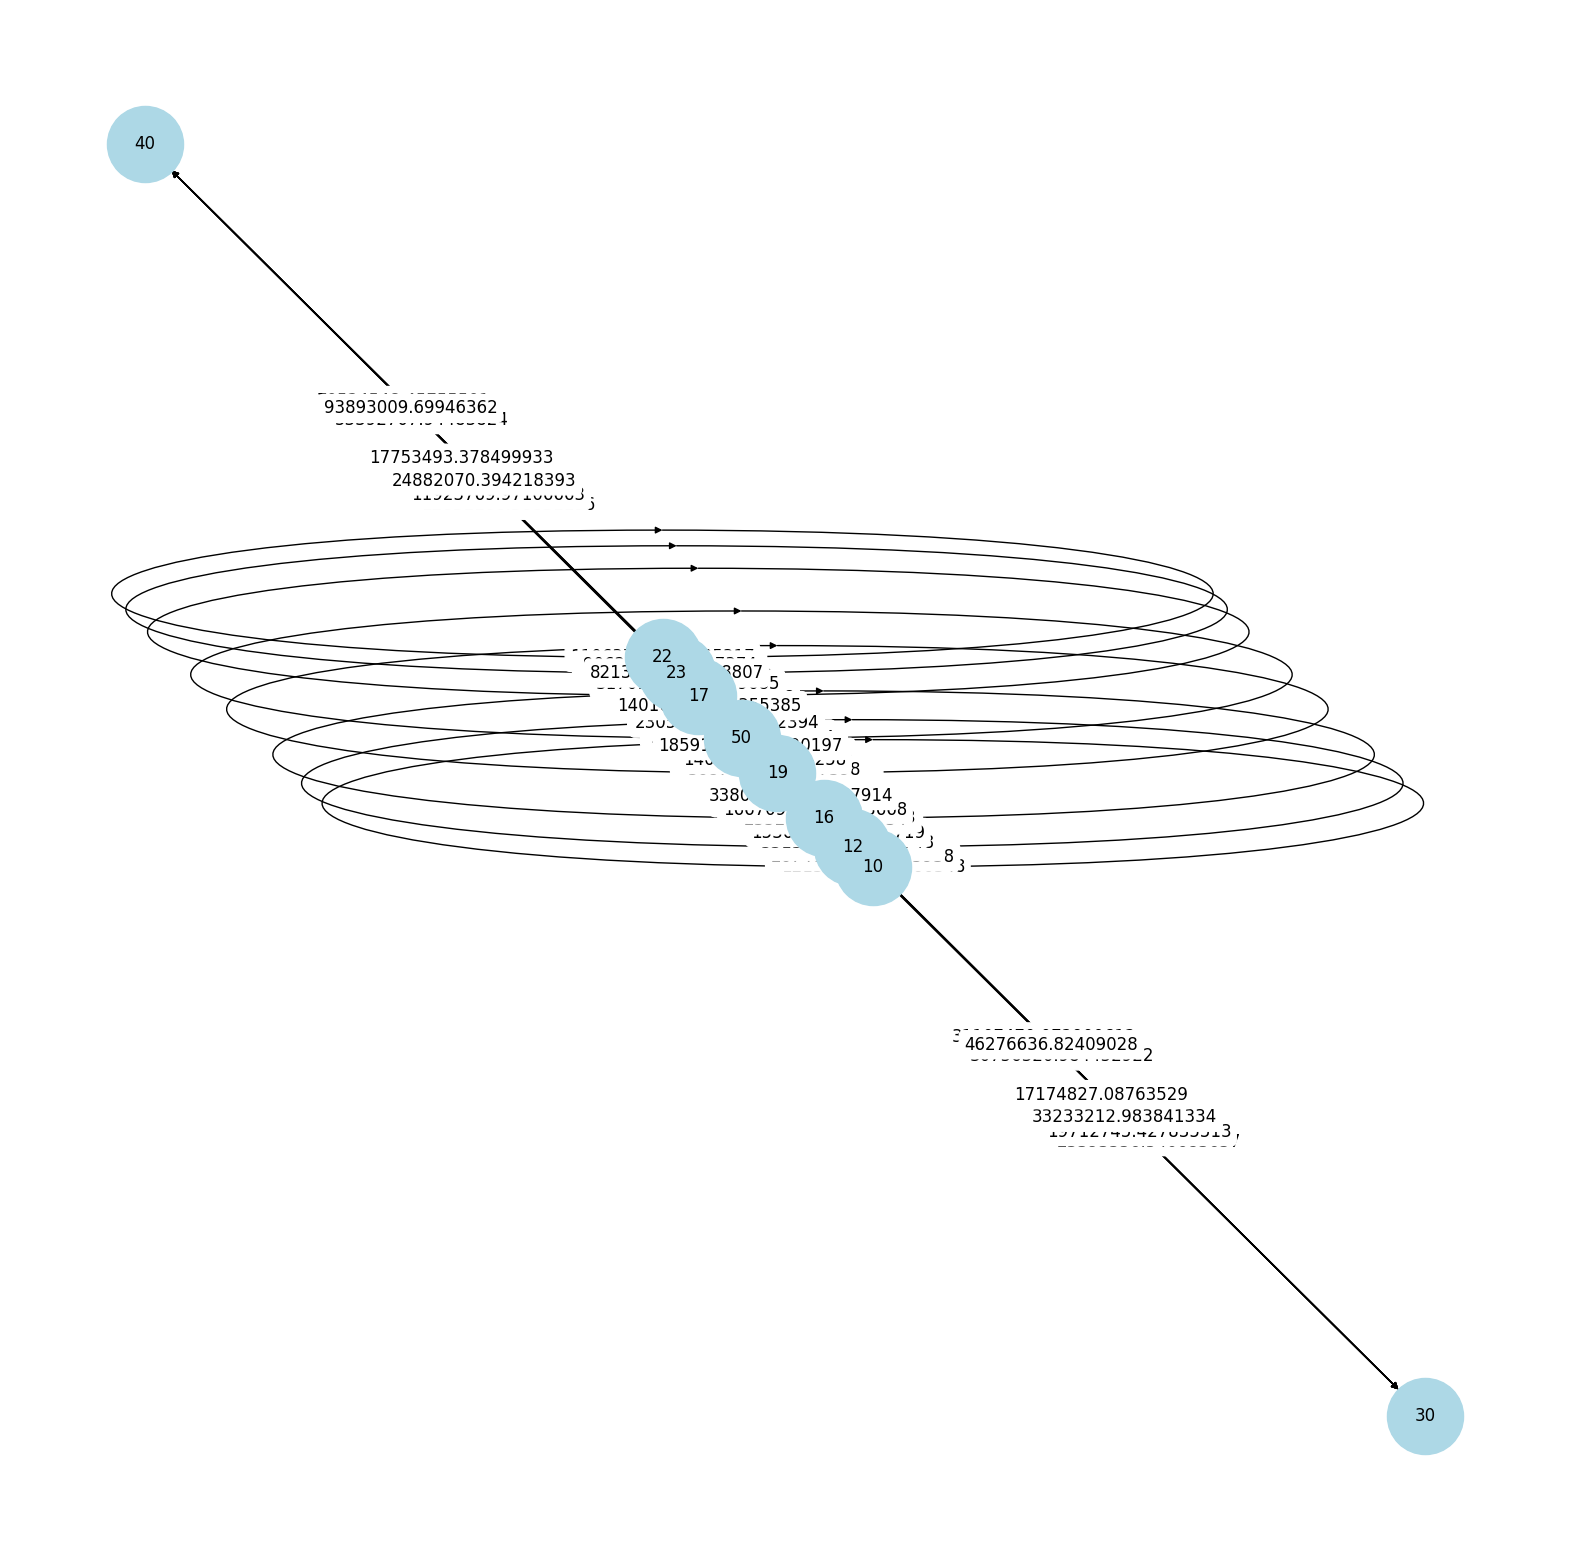

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the WIOD dataset
df = pd.read_csv("WIOD.csv")

# Create a dictionary of edges and their weights
edges = {}
for index, row in df.iterrows():
    source = row["col_id"]
    target = row["row_id"]
    weight = row["value"]
    if (source, target) in edges:
        edges[(source, target)] += weight
    else:
        edges[(source, target)] = weight

# Create a directed graph
G = nx.DiGraph()
G.add_weighted_edges_from([(source, target, weight) for (source, target), weight in edges.items()])

# Calculate PageRank centrality
pr = nx.pagerank(G, weight="weight")

# Print the top 10 nodes by PageRank centrality
top_nodes = set(sorted(pr, key=pr.get, reverse=True)[:10])
print("Top 10 nodes by PageRank centrality:")
for node in top_nodes:
    print(f"{node}: {pr[node]}")

# Create a subgraph with only the top ranked nodes and their edges
H = G.subgraph(top_nodes)

# Draw the subgraph with increased size
pos = nx.spring_layout(H, seed=42)
fig, ax = plt.subplots(figsize=(20, 20))
nx.draw(H, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, ax=ax)
edge_labels = {(u, v): d["weight"] for u, v, d in H.edges(data=True)}
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=12, label_pos=0.5, rotate=False, ax=ax)
plt.show()


Using a different ALgorithm named hits for the same problem

Top 10 nodes by HITS authority score:
3: 0.0226878637220494
40: 0.020738164272650673
10: 0.020399128343006525
16: 0.03281456666413422
17: 0.04829807298205467
50: 0.4861690507098536
19: 0.020239736306884453
22: 0.05936136378190328
23: 0.08004165119570338
30: 0.02075101016300593


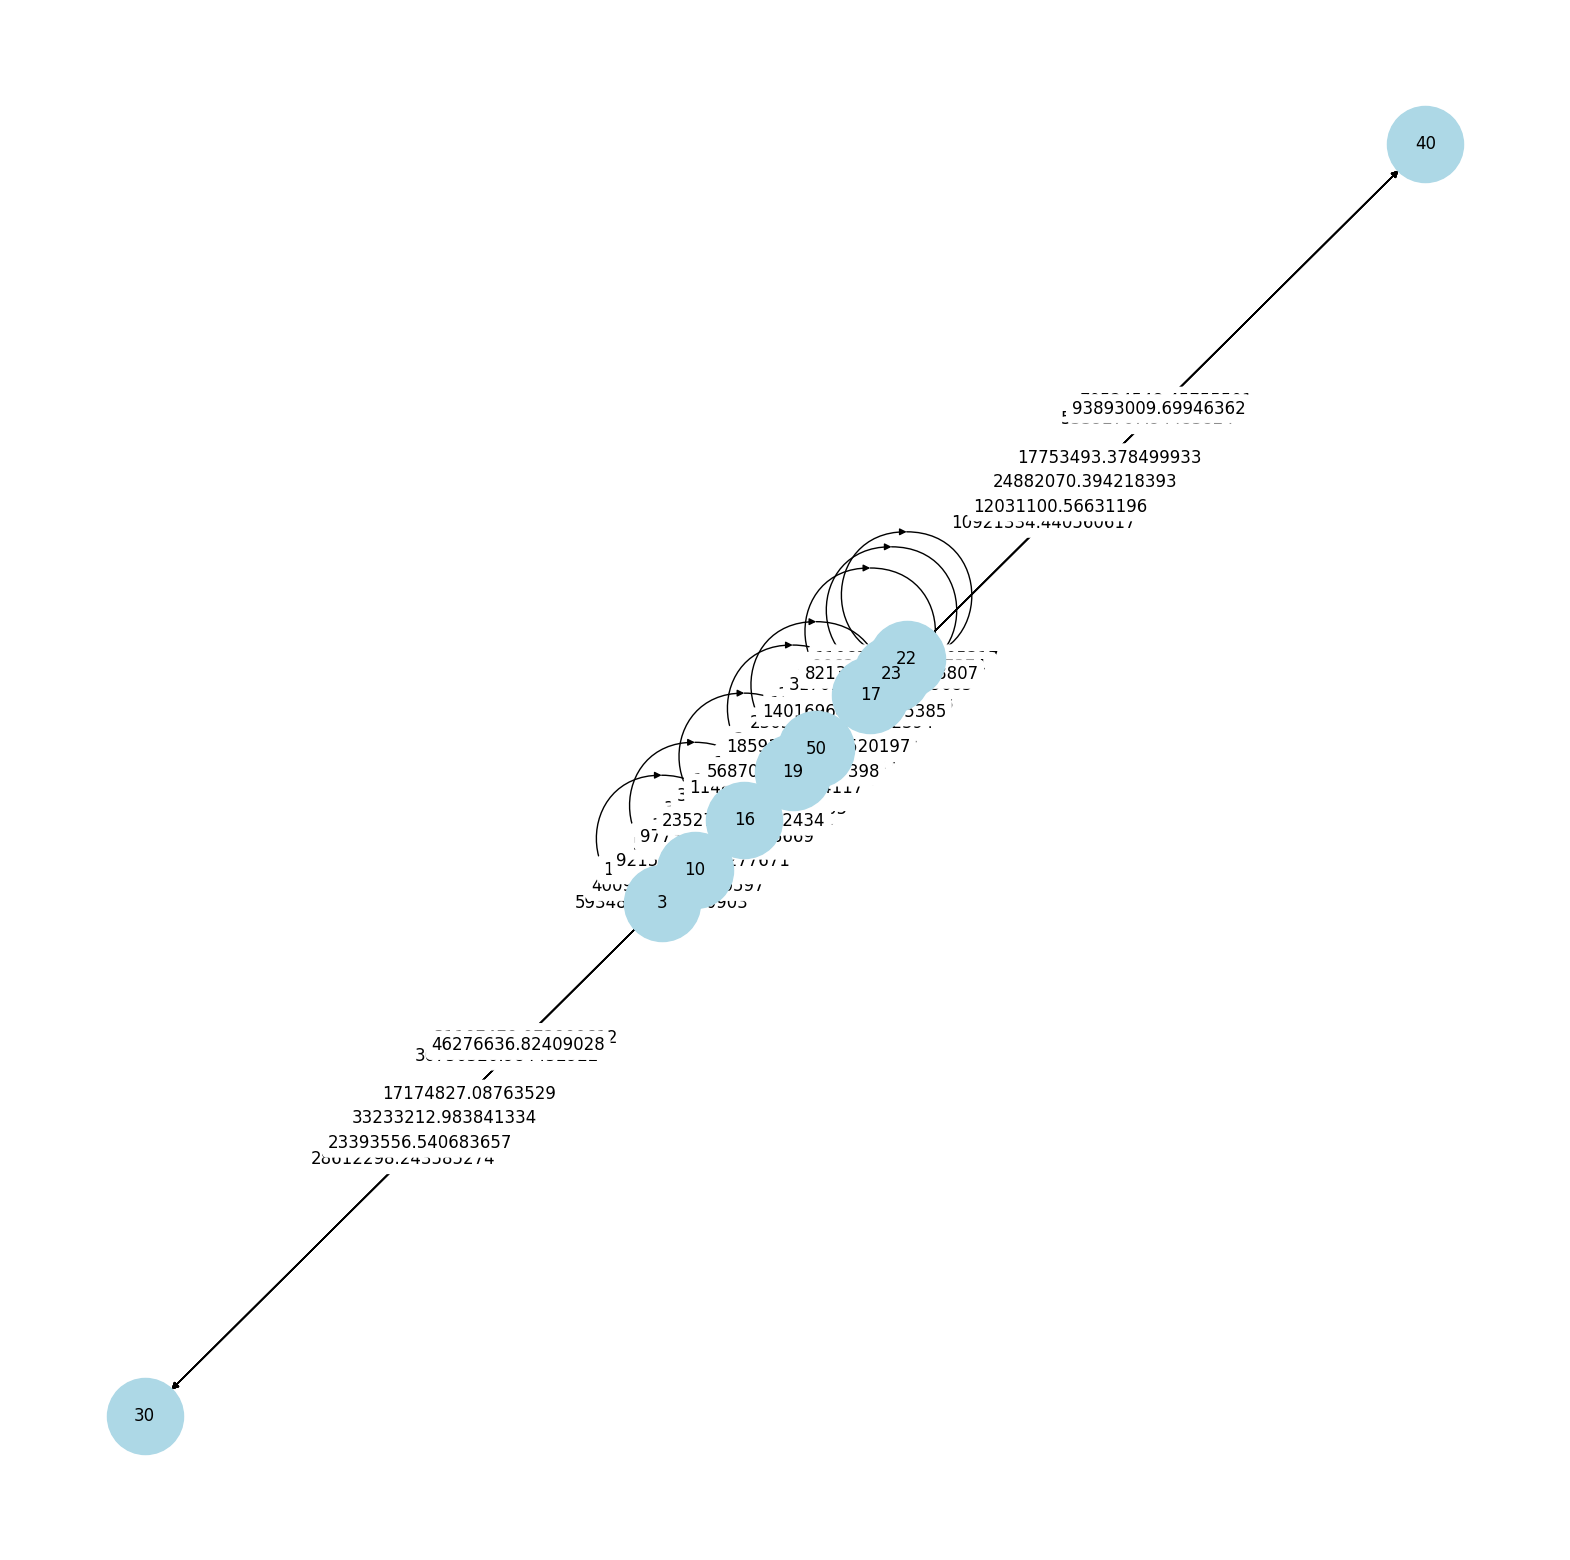

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the WIOD dataset
df = pd.read_csv("WIOD.csv")

# Create a dictionary of edges and their weights
edges = {}
for index, row in df.iterrows():
    source = row["col_id"]
    target = row["row_id"]
    weight = row["value"]
    if (source, target) in edges:
        edges[(source, target)] += weight
    else:
        edges[(source, target)] = weight

# Create a directed graph
G = nx.DiGraph()
G.add_weighted_edges_from([(source, target, weight) for (source, target), weight in edges.items()])

# Calculate HITS centrality
hubs, authorities = nx.hits(G, max_iter=100)

# Print the top 10 nodes by HITS authority score
top_nodes = set(sorted(authorities, key=authorities.get, reverse=True)[:10])
print("Top 10 nodes by HITS authority score:")
for node in top_nodes:
    print(f"{node}: {authorities[node]}")

# Create a subgraph with only the top ranked nodes and their edges
H = G.subgraph(top_nodes)

# Draw the subgraph with increased size
pos = nx.spring_layout(H, seed=42)
fig, ax = plt.subplots(figsize=(20, 20))
nx.draw(H, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, ax=ax)
edge_labels = {(u, v): d["weight"] for u, v, d in H.edges(data=True)}
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=12, label_pos=0.5, rotate=False, ax=ax)
plt.show()
